In [135]:
#Importing the necessary libraries for the project

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import calendar
sns.set_style('darkgrid')

import itertools

# INTRODUCTION

#### An exploratory data analysis was performed an a dataset collected from the Movie Database (TMDb). The dataset contains information about 10,000 movies including information on user ratings and revenue. The Project has been organized into three seperate steps:

* Data Wrangling
* Exploratory Analysis
* Conclusions and Limitations
 
   

In [136]:
#loading the dataset to be used for the project

df = pd.read_csv("tmdb-movies.csv")

# WRANGLING THE DATA TO PREPARE IT FOR FOR ANALYSIS

In [137]:
#Checking out the general information of the dataset. The number of columns and rows, as well the datatypes.

df.info()

#From the results it can be seen that the dataframe has 21 columns and 10866 rows. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [138]:
#DROPPING UNWANTED COLUMNS FROM THE DATASETS. These columns would not be needed to answer any questions in this Project

df.drop(['imdb_id','budget', 'revenue', 'homepage','keywords','overview','vote_count','vote_average'], axis=1, inplace=True)



In [139]:
#Checking the dataframe to ensure that the columns have been dropped.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   original_title        10866 non-null  object 
 3   cast                  10790 non-null  object 
 4   director              10822 non-null  object 
 5   tagline               8042 non-null   object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  release_year          10866 non-null  int64  
 11  budget_adj            10866 non-null  float64
 12  revenue_adj           10866 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 1.1+ MB


In [140]:
#checking the dataframe for columns with missing values or non zero values or null/Nan values.
df.isna().any()

id                      False
popularity              False
original_title          False
cast                     True
director                 True
tagline                  True
runtime                 False
genres                   True
production_companies     True
release_date            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [141]:
#Dropping the rows with missing data.These non zero values could interfere in analysis if not removed.
df.dropna(inplace = True)

#checking the dataframe to ensure that the rows with missing data have been removed. 
df.isna().any()

id                      False
popularity              False
original_title          False
cast                    False
director                False
tagline                 False
runtime                 False
genres                  False
production_companies    False
release_date            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [142]:
#checking the dataframe to see if there is are any duplicates

sum(df.duplicated())





1

In [143]:
#Dropping or removing those duplicates from the dataframe
df.drop_duplicates(inplace = True)

#checking to see of those duplicates have been removed from the dataframe
sum(df.duplicated())

0

In [144]:
df.info()

#From the information below about the dataset , it is clear that the datatype for the release date is not appropraite and thus 
#have to be changed from an integer to a datetime.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7635 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7635 non-null   int64  
 1   popularity            7635 non-null   float64
 2   original_title        7635 non-null   object 
 3   cast                  7635 non-null   object 
 4   director              7635 non-null   object 
 5   tagline               7635 non-null   object 
 6   runtime               7635 non-null   int64  
 7   genres                7635 non-null   object 
 8   production_companies  7635 non-null   object 
 9   release_date          7635 non-null   object 
 10  release_year          7635 non-null   int64  
 11  budget_adj            7635 non-null   float64
 12  revenue_adj           7635 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 835.1+ KB


In [145]:
#Converting the release_date column datatype to a datetime

df['release_date'] = pd.to_datetime(df['release_date'])

#Checking the dataframe to ensure that the release_date column datatype has been changed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7635 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    7635 non-null   int64         
 1   popularity            7635 non-null   float64       
 2   original_title        7635 non-null   object        
 3   cast                  7635 non-null   object        
 4   director              7635 non-null   object        
 5   tagline               7635 non-null   object        
 6   runtime               7635 non-null   int64         
 7   genres                7635 non-null   object        
 8   production_companies  7635 non-null   object        
 9   release_date          7635 non-null   datetime64[ns]
 10  release_year          7635 non-null   int64         
 11  budget_adj            7635 non-null   float64       
 12  revenue_adj           7635 non-null   float64       
dtypes: datetime64[ns]

In [146]:
#Checking if there are any zero values present in the dataframe. These zero values when present, especially in the numerical 
# datatype columns can interfere in the analysis of the data.

0 in df.values

True

In [147]:
# Querying the dataframe for the numerical columns (revenue_adj,budget_adj,runtime) which contain zero values. 
#these numerical columns are very crucial to the objectives of the analysis. Hence its important that they don't contain zero values

df.query(' runtime ==0 or budget_adj ==0 or revenue_adj ==0')

,id,popularity,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
30,280996,3.927333,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,The man behind the myth,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,2015,0.000000e+00,27006774.88
36,339527,3.358321,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,"A serial killer who can see your future, a psy...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,2015-09-03,2015,0.000000e+00,20566197.19
48,265208,2.932340,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,Never bet against a man with a killer hand.,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,2015-01-14,2015,2.759999e+07,0.00
67,334074,2.331636,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,His Next Target is Now Hunting Him,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,2015-05-21,2015,1.839999e+07,0.00
75,308369,2.141506,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,105,Comedy|Drama,Indian Paintbrush,2015-06-12,2015,0.000000e+00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10858,31918,0.317824,"The Russians Are Coming, The Russians Are Coming",Carl Reiner|Eva Marie Saint|Alan Arkin|Brian K...,Norman Jewison,IT'S A PLOT! ...to make the world die laughing!!,126,Comedy|War,The Mirisch Corporation,2066-05-25,1966,0.000000e+00,0.00
10860,5060,0.087034,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,2066-05-20,1966,0.000000e+00,0.00
10862,20379,0.065543,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,1966,0.000000e+00,0.00
10864,21449,0.064317,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,WOODY ALLEN STRIKES BACK!,80,Action|Comedy,Benedict Pictures Corp.,1966-11-02,1966,0.000000e+00,0.00


In [148]:
# In order to remove the zero values, lets first set them to Null. We can later remove them completely by dropping all the 
#NULL values.

df['budget_adj'].replace(0, np.NAN, inplace=True)
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

In [149]:
#Checking the dataframe to ensure that, the zeroes have been replaced with the NAN. The true values for the runtime,budget_adj    
# and revenue_adj shows that the zeroes in those fields have been filled with NAN 

df.isna().any()

id                      False
popularity              False
original_title          False
cast                    False
director                False
tagline                 False
runtime                  True
genres                  False
production_companies    False
release_date            False
release_year            False
budget_adj               True
revenue_adj              True
dtype: bool

In [150]:
#Checking the dataframe to ensure that there are no zero values left
0  in df

False

In [151]:
#Dropping all the Null or Nan values from the dataframe
df.dropna(inplace = True)

#checking the dataframe to ensure that the Null or Nan values have been removed. 
df.isna().any()

id                      False
popularity              False
original_title          False
cast                    False
director                False
tagline                 False
runtime                 False
genres                  False
production_companies    False
release_date            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [152]:
#Checking the dataframe again to ensure that there are no zero values left
0  in df

False

# SUMMARY OF THE DATA WRANGLING APPLIED TO THE DATASET

- The columns which were not needed for analysis were dropped.
- The Null or Nan or missing data values were also removed from the dataframe.
- All Duplicates were also removed from the dataframe.
- The datatype of a column was changed to an appropraite datatype.
- All zero values were removed from the dataframe.

*************************************************************************************************************************

# THE DATA ANALYSIS ON THIS DATASET WAS MOTIVATED BY THE FOLLOWING QUESTIONS:

 1. Which movies have good taglines?Are movies with good taglines more popular than those with bad taglines?
 2. What is the most popular month for releasing movies?
 3. Does movie runtime affect budget?
 

### Q1. Which movies have good taglines? Are movies with good taglines more popular than those with bad taglines?



In [153]:

#creating a function to check the number of spaces between words to allow us to count the number of words in the tagline

def check_space(Test_string):
    return Test_string.count(" ")

    


In [154]:
a = list(df["tagline"])
b = list()

for i in a:
    c = check_space(i) + 1
    b.append(c)


In [155]:
df["number_of_words_in_tagline"]= b

#This line of code provides a dataframe with taglines less than or equal to 10
good_taglines = df.query("number_of_words_in_tagline <=10")

#This line of code provides a dataframe with taglines greater to 10
bad_taglines = df.query("number_of_words_in_tagline > 10")

#This line of code gives a list of the movies which have a good tagline
good_taglines.original_title

#This line of code gives a list of the movies which have a bad tagline
bad_taglines.original_title

22                           San Andreas
33                       Bridge of Spies
97                              The DUFF
111                          Dark Places
183                                Aloha
                      ...               
10788                            The Wiz
10793                     Watership Down
10822    Who's Afraid of Virginia Woolf?
10835                   The Sand Pebbles
10848                   Fantastic Voyage
Name: original_title, Length: 782, dtype: object

**Movies with good taglines**

In [156]:
good_taglines.original_title

0                        Jurassic World
1                    Mad Max: Fury Road
2                             Insurgent
3          Star Wars: The Force Awakens
4                             Furious 7
                      ...              
10779                            Convoy
10780    Invasion of the Body Snatchers
10791                   Damien: Omen II
10828                      Torn Curtain
10829                         El Dorado
Name: original_title, Length: 2762, dtype: object

**Movies with bad taglines**

In [157]:
bad_taglines.original_title

22                           San Andreas
33                       Bridge of Spies
97                              The DUFF
111                          Dark Places
183                                Aloha
                      ...               
10788                            The Wiz
10793                     Watership Down
10822    Who's Afraid of Virginia Woolf?
10835                   The Sand Pebbles
10848                   Fantastic Voyage
Name: original_title, Length: 782, dtype: object

In [158]:
# Fidning the mean popularity of movies with good taglines.
g1 = good_taglines.popularity.mean()

# Fidning the mean popularity of movies with bad taglines.
g2 = bad_taglines.popularity.mean()

g1

1.3222753587979734

In [159]:
g2

0.9927955115089517

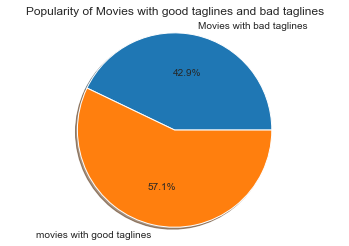

In [160]:
# Using a pie chart to visualize the popularity of movies with good or bad taglines

heights = [g2 ,g1]
label = ['Movies with bad taglines', 'movies with good taglines']
plt.pie(heights,labels=label,autopct='%1.1f%%',shadow = True)
plt.title('Popularity of Movies with good taglines and bad taglines')
plt.axis('equal')
plt.show()

**The pie chart reveals a much higher popularity for movies with good taglines than movies with bad taglines.This relationship expressed in percentage is, a 57.1% popularity for movies with good taglines and 42.9% for movies with bad taglines.** 

### Q2 What is the most popular month for releasing movies?




In [161]:
#creating a new column for only the month number

df['rel_month'] = pd.to_datetime(df['release_date']).dt.month


# changing the numerical month number into strings using a lambda function
df['rel_month'] = df['rel_month'].apply(lambda x: calendar.month_abbr[x])


In [162]:
#checking the dataframe to see if the new column has been added, and also verify the string datatype of the new column.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3544 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          3544 non-null   int64         
 1   popularity                  3544 non-null   float64       
 2   original_title              3544 non-null   object        
 3   cast                        3544 non-null   object        
 4   director                    3544 non-null   object        
 5   tagline                     3544 non-null   object        
 6   runtime                     3544 non-null   float64       
 7   genres                      3544 non-null   object        
 8   production_companies        3544 non-null   object        
 9   release_date                3544 non-null   datetime64[ns]
 10  release_year                3544 non-null   int64         
 11  budget_adj                  3544 non-null   float64    

In [163]:
#checking the unique months in the dataset
df["rel_month"].unique()

array(['Jun', 'May', 'Mar', 'Dec', 'Apr', 'Sep', 'Oct', 'Feb', 'Jan',
       'Jul', 'Nov', 'Aug'], dtype=object)

In [164]:
# grouping the dataframe based on the month of release of the movie, counting the number of times a movie has been released in a 
# particular month and storing it in a variable.

pop_rel_month = df.groupby(["rel_month"]).rel_month.count().sort_values()

# This variable contains the counts of all movies released in a particular month
pop_rel_month

rel_month
Jan    198
Feb    231
Apr    248
Mar    267
May    267
Nov    280
Jul    295
Aug    314
Jun    322
Oct    336
Dec    377
Sep    409
Name: rel_month, dtype: int64

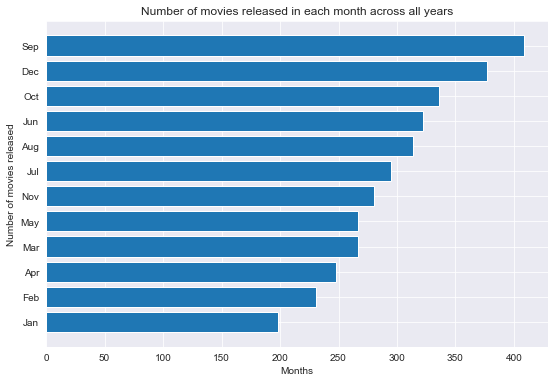

In [165]:
# plotting a bar graph to visualize the number of movies released each month

plt.subplots(figsize=(9, 6))
plt.barh(pop_rel_month.index, pop_rel_month)
plt.title('Number of movies released in each month across all years')
plt.xlabel('Months')
plt.ylabel('Number of movies released');

**The bar chart clearly shows that the month of September has the highest number of movies released in that month than any other month.With about four-hundred-nine (409) movies released in that month alone. The month of January had the least number of releases, with almost less than half the movies released in September**.  

# Q3. Does movie runtime affect budget?

***Taking a look at the mean runtime and budgets for all the movies in the datasets, to gain an idea of their distribution***

In [166]:
df.describe()

,id,popularity,runtime,release_year,budget_adj,revenue_adj,number_of_words_in_tagline
count,3544.000000,3544.000000,3544.000000,3544.000000,3.544000e+03,3.544000e+03,3544.000000
mean,39203.165914,1.249574,109.239560,2001.163657,4.626151e+07,1.456888e+08,7.986738
std,66688.101410,1.518328,19.628584,11.323946,4.545013e+07,2.216669e+08,4.638205
min,5.000000,0.010335,26.000000,1960.000000,9.693980e-01,2.861934e+00,1.000000
25%,5250.250000,0.495968,96.000000,1995.000000,1.454097e+07,2.235019e+07,5.000000
50%,11058.500000,0.863480,106.000000,2004.000000,3.170397e+07,6.902453e+07,7.000000
75%,38321.250000,1.439614,119.000000,2010.000000,6.314258e+07,1.755785e+08,10.000000
max,417859.000000,32.985763,338.000000,2015.000000,4.250000e+08,2.827124e+09,49.000000


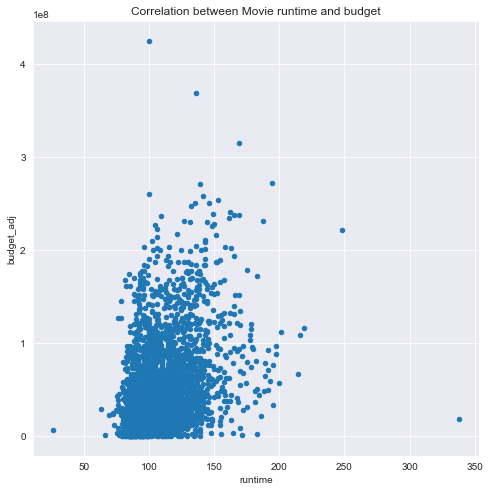

In [167]:
# Using a scatter plot to see if there is a correlation between budget and movie runtime

df.plot(x='runtime', y= 'budget_adj', kind = 'scatter', title = "Correlation between Movie runtime and budget", figsize = (8,8));

**The scatter plot reveals a positive correlation between movie budget and runtime. As the runtime increases the budget of the movies increases. There are some outliers also present in the plot. Particularly for some movies with longer runtimes but with a very small budget**.

In [168]:
# Lets go a step further in answering the question, lets compare the mean of the budget two movie groups. One with longer runtime
#and one with shorter runtime.

#creating a dataframe for movies with long runtime
long_runtime = df.query('runtime > runtime.mean()')

# finding the mean budget of the movies with longer runtime
x = long_runtime["budget_adj"].mean()

In [169]:
#creating a dataframe for movies with short runtime
short_runtime = df.query('runtime <= runtime.mean()')

# finding the mean budget of the movies with shorter runtime
y = short_runtime["budget_adj"].mean()

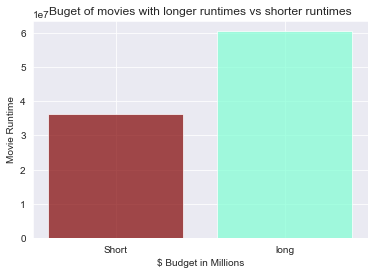

In [170]:
# plotting a bar graph to visualize the comparison of the mean budget of the two movie groups.

locations = [1, 2]
heights = [y ,x]
labels = ['Short', 'long']
plt.bar(locations, heights, tick_label=labels,color = ["maroon","Aquamarine"],alpha = 0.7)
plt.title('Buget of movies with longer runtimes vs shorter runtimes')
plt.xlabel('$ Budget in Millions')
plt.ylabel('Movie Runtime');

**The buget of movies with long and short runtimes were compared using this bar chart.The chart clearly shows that movies with longer runtimes have bigger budgets than those with shorter runtimes, with longer runtimes having a average budget of about 60,42,198 dollars and shorter runtimes with average budget of 36,349,623 dollars**.

In [171]:
df.release_year.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

# CONCLUSIONS

**Out of the 7,635 movies in the dataset, 1,740 movies had good taglines.A movie with a good tagline is expected to have average length of 3 to 10 words.The mean popularity of movies with a good tagline is 0.18 higher than movies with bad tag lines. From the analysis it can also be concluded that september is the most popular month for releasing movies.A sccatter plot was used in an attempt to visualize the correlation between movie runtime and buget. There seemed to be positive correlation between budget and movie runtime.Further analysis was done to properly answer the question by comparing the budget of movies with shorter runtime to movies with longer runtimes.It was discovered that,movies with longer runtimes have bigger budgets than those with shorter runtimes. From the analysis the budgets of movies with longer runtime was $21,986,295 higher than those with shorter runtimes**. 

# LIMITATIONS

**One major limitation I ecountered was the number of zero values in the dataframe,especially in the numerical columns 
that were crucial to my analysis. This slowed down the analysis of the dataset because it took a while to remove them**.